## About this program



In [1]:
maxOcc ="5orLess"  #1 is hard-core
U=40
V=-1.97
maxN = 9

In [2]:
from numpy import zeros, sqrt, linalg, loadtxt,array, ones, exp, eye, copy,sign,real,imag,transpose,log,average,sort, var, conj, math, var,append, save,argsort, delete
from numpy.linalg import inv
import matplotlib.pyplot as plt
from random import randint
from scipy.sparse import lil_matrix
from scipy.optimize import basinhopping, dual_annealing, shgo, direct, brute, differential_evolution, minimize
from scipy.sparse.linalg import eigsh
import time

def loadData(N,rho=0.25,U=40,V=-1.97):
    if maxOcc=="5orLess":
        phi = loadtxt("Ns%i_N%i_J%f_U%f_V%f"%(round(N/rho),N,1,U,V))   
    else:
        phi = loadtxt("Ns%i_N%i_J%f_U%f_V%f_maxOcc%d"%(round(N/rho),N,1,U,V,maxOcc))
    phi /= sqrt(sum(sum(abs(phi)**2)))
    return phi

def loadDataC(N,rho=0.25,U=40,V=-1.97):
    if maxOcc=="5orLess":
        phi = loadtxt("Ns%i_N%i_J%f_U%f_V%f"%(round(N/rho),N,1,U,V),dtype=complex)   
    else:
        phi = loadtxt("Ns%i_N%i_J%f_U%f_V%f_maxOcc%d"%(round(N/rho),N,1,U,V,maxOcc),dtype=complex)
    phi /= sqrt(sum(sum(abs(phi)**2)))
    return phi

def plotLines(N):  
    phi = loadData(N)
    Ns = round(N/0.25)
   # plt.plot([real(phi)[i,i] for i in range(Ns)])
   # plt.plot([real(phi)[i,Ns-1-i] for i in range(Ns)])
    plt.plot([real(phi)[int(Ns/2),i] for i in range(Ns)])
    
def plotLinesConstSize(N,V,ax):  
    Ns = 20
    phi = loadData(N,rho=N/Ns,V=V)
    ax[0].plot([real(phi)[i,i] for i in range(Ns)])
    ax[2].plot([real(phi)[i,Ns-1-i] for i in range(Ns)],label=str(N))
    ax[1].plot([real(phi)[int(Ns/2),i] for i in range(Ns)])

def imshowConstSize(N,V,U, ax):  
    Ns = 20
    phi = loadData(N,rho=N/Ns,V=V,U=U)
    ax.imshow(real(phi))




fig, ax = plt.subplots(2,4,figsize=[10,5])
for N in range(2,maxN+1):
    imshowConstSize(N=N,V=V,U=U, ax=ax[int((N-2)/4),int((N-2)%4)])

ax[0,0].text(2,1,'A',c='r')
ax[0,1].text(2,9.5,'B',c='r')
ax[0,2].text(2,18.5,'C',c='r')
ax[0,0].plot([0,19], [0,19], 'r', linestyle="--")
ax[0,2].plot([19,0], [0,19], 'r', linestyle="--")
ax[0,1].plot([0,19], [10,10], 'r', linestyle="--")

ax[0,0].set_title("N=2")
ax[0,1].set_title("N=3")
ax[0,2].set_title("N=4")
ax[0,3].set_title("N=5")
ax[1,0].set_title("N=6")
ax[1,1].set_title("N=7")
ax[1,2].set_title("N=8")
ax[1,3].set_title("N=9")

fig2, ax2 = plt.subplots(1,3,figsize=[10,3])
for N in range(2,maxN+1):
    plotLinesConstSize(N=N,V=V, ax=ax2)


def posytxt(ax_):
    ymin = ax_.get_ylim()[0]
    ymax = ax_.get_ylim()[1]
    return ymax- 0.15*(ymax-ymin)
    
ax2[0].grid()
ax2[1].grid()
ax2[2].grid()
ax2[0].text(0,posytxt(ax2[0]),'A',c='r',fontsize=20)
ax2[1].text(0,posytxt(ax2[1]),'B',c='r',fontsize=20)
ax2[2].text(0,posytxt(ax2[2]),'C',c='r',fontsize=20)
ax2[2].legend()
plt.show()


FileNotFoundError: Ns20_N2_J1.000000_U40.000000_V-1.970000 not found.

2 3 0.7702648745308925
2 4 0.9515886636352708
2 5 0.9750027127483043
2 6 0.9827850669694743
2 7 0.979998992775609
2 8 0.9797349297328354
2 9 0.9793481664903785


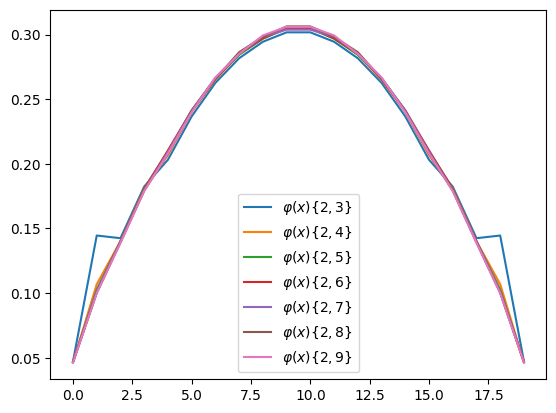

In [172]:
import numpy as np
from scipy.optimize import basinhopping



def getVarphi(N,Np):
    Ns=20
    phiN = loadDataC(N,rho=N/Ns,V=V)
    phiNp = loadDataC(Np,rho=Np/Ns,V=V)
    div = phiN/phiNp
    for i in range(Ns):
        for j in range(Ns):
            if abs(div[i,j])>10:
                div[i,j]=1
    prod = (div)**((N-1)*(Np-1)/(Np-N))
    u, s, vh = np.linalg.svd(prod)
    varphi = abs(vh[0])
    print(N,Np,s[0]**2/sum(s**2))
    varphi /= np.sqrt(sum(abs(varphi)**2))
    return real(varphi)

plt.plot(getVarphi(N=2,Np=3),label=r'$\varphi(x)\{2,3\}$')
plt.plot(getVarphi(N=2,Np=4),label=r'$\varphi(x)\{2,4\}$')
plt.plot(getVarphi(N=2,Np=5),label=r'$\varphi(x)\{2,5\}$')
plt.plot(getVarphi(N=2,Np=6),label=r'$\varphi(x)\{2,6\}$')
plt.plot(getVarphi(N=2,Np=7),label=r'$\varphi(x)\{2,7\}$')
plt.plot(getVarphi(N=2,Np=8),label=r'$\varphi(x)\{2,8\}$')
plt.plot(getVarphi(N=2,Np=9),label=r'$\varphi(x)\{2,9\}$')

# plt.plot(getVarphi(N=3,Np=4),label="3,4")
# plt.plot(getVarphi(N=3,Np=5),label="3,5")
# plt.plot(getVarphi(N=3,Np=6),label="3,6")
# plt.plot(getVarphi(N=3,Np=7),label="3,7")
# plt.plot(getVarphi(N=3,Np=8),label="3,8")
# plt.plot(getVarphi(N=3,Np=9),label="3,9")

# plt.plot(getVarphi(N=4,Np=5),label="4,5")
# plt.plot(getVarphi(N=4,Np=6),label="4,6")
# plt.plot(getVarphi(N=4,Np=7),label="4,7")
# plt.plot(getVarphi(N=4,Np=8),label="4,8")
# plt.plot(getVarphi(N=4,Np=9),label="4,9")

# plt.plot(getVarphi(N=5,Np=6),label="5,6")
# plt.plot(getVarphi(N=5,Np=7),label="5,7")
# plt.plot(getVarphi(N=5,Np=8),label="5,8")
# plt.plot(getVarphi(N=5,Np=9),label="5,9")

#plt.plot(getVarphi(N=6,Np=7),label="6,7")
# plt.plot(getVarphi(N=6,Np=8),label="6,8")
# plt.plot(getVarphi(N=6,Np=9),label="6,9")

#plt.plot(getVarphi(N=7,Np=8),label="7,8")
#plt.plot(getVarphi(N=7,Np=9),label="7,9")

#plt.plot(getVarphi(N=8,Np=9),label="8,9")

plt.legend()
plt.show()

##Tutaj sprawdxzamy jak dobre jest oszacowanie bazujące na funkcji juednociałowej

In [183]:
Ns = range(2,9)
vals = []
for N in Ns:
    vals.append( real(loadDataC(N,N/20,U=U,V=V)[9,11]) )
plt.plot(Ns,vals,'o')

In [174]:
Ns=20
N = 9

PHI = loadDataC(2,2/20,U=U,V=V)
PhiR = loadDataC(N,N/20,U=U,V=V)
PhiM1 = loadDataC(N-1,(N-1)/20,U=U,V=V)
PhiM2 = loadDataC(N-2,(N-2)/20,U=U,V=V)


Phi = zeros([Ns,Ns],dtype=complex)


for x in range(Ns):
    for xp in range(Ns):
      #  Phi[x,xp]=(PHI[x,xp]/PhiM1[x,xp])**((N-2)/(N-3))*PHI[x,xp]
        
        #Phi[x,xp] = PhiM1[x,xp]*(PhiM1[x,xp]/PhiM2[x,xp])**((N-1)*(N-2))
        Phi[x,xp] = PhiM1[x,xp] +(PhiM1[x,xp]-PhiM2[x,xp])

# for x in range(Ns):
#     for xp in range(Ns):
#         Phi[x,xp] = (varphi[x]*varphi[xp])**(1/(N-1))*PHI[x,xp]

PhiR /= sqrt(sum(sum(abs(PhiR)**2)))
Phi /= sqrt(sum(sum(abs(Phi)**2)))
        
fig, ax = plt.subplots(1,4,figsize=[12,2])
cmap = ax[0].imshow(abs(PHI))
cbar = plt.colorbar(cmap)
cmap = ax[1].imshow(abs(PhiR))
cbar = plt.colorbar(cmap)
cmap = ax[2].imshow(abs(Phi))
cbar = plt.colorbar(cmap)
cmap = ax[3].imshow(abs(Phi-PhiR))
cbar = plt.colorbar(cmap)


print("A=",sqrt(sum(sum(abs(Phi-PhiR)**2))))
print("A=",sqrt(sum(sum(abs(PhiM1-PhiR)**2))))
plt.show()

A= 0.008672423998570534
A= 0.013204090284070822


phi: [0.9767201  0.06174437 0.06107696 0.06097355 0.05917758 0.05823559
 0.05666788 0.05525472 0.05343073 0.05221314 0.04996876 0.0480178
 0.04600841 0.04307113 0.04192248 0.03950366 0.03624788 0.03609468
 0.02643626 0.02470701]
Phi: [0.98670161 0.03365501 0.03320649 0.03301393 0.03215914 0.03099558
 0.03097475 0.02947783 0.0284889  0.0283388  0.02781064 0.02702071
 0.02557445 0.02478161 0.02320451 0.02096935 0.01887376 0.0180256
 0.01077983 0.00921195]


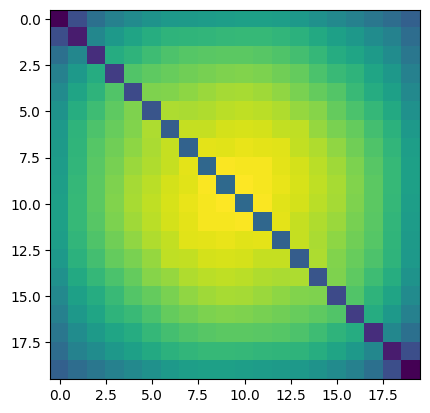

In [57]:
phi = loadData(N=N,rho=N/20,V=V)
Phi = phi.copy()


def leak( f ):
    Phi = phi.copy()
    for i in range(20):
        Phi[i,i]=f[i]

    Phi /= sum(sum(abs(Phi)**2))
    u, s, vh = np.linalg.svd(Phi, full_matrices=True)
    return 1-s[0]**2

f0 = [0]*20
for i in range(19):
    f0[i]=phi[i,i+1]*0.52
f0[19]=phi[i,i-1]*0.52

ret = minimize(leak, f0, method='Powell', tol=1e-12, bounds=[(1e-12,1)]*len(f0))
#minimizer_kwargs = {"method": "Powell"}
#ret = basinhopping(leak, f0, minimizer_kwargs=minimizer_kwargs,niter=200)

f = ret.x
#print(f)
Phi = phi.copy()
for i in range(20):
    Phi[i,i]=f[i]
Phi /= sum(sum(abs(Phi)**2))
    
u, s, vh = np.linalg.svd(phi, full_matrices=True)
print('phi:',s)
u, s, vh = np.linalg.svd(Phi, full_matrices=True)
print('Phi:',s)
plt.imshow(Phi)

In [58]:
import numpy as np
N=7
phi = loadData(N=N,rho=N/20,V=-1.97)

Phi = phi.dot(phi)
u, s, vh = np.linalg.svd(Phi, full_matrices=True)
print(s)
#print(phi[1,3])
#print(phi)
plt.imshow(real(phi))

[9.53982145e-01 3.81236729e-03 3.73039559e-03 3.71777345e-03
 3.50198563e-03 3.39138388e-03 3.21124884e-03 3.05308362e-03
 2.85484273e-03 2.72621151e-03 2.49687720e-03 2.30570893e-03
 2.11677423e-03 1.85512210e-03 1.75749424e-03 1.56053893e-03
 1.31390866e-03 1.30282620e-03 6.98875689e-04 6.10436545e-04]
